In [29]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap, to_rgba
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

%config InlineBackend.figure_format = 'retina'

In [30]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["figure.titlesize"] = 18
plt.rcParams["axes.titlesize"] = 18

In [31]:
color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

BLUE = color_cycle[0]
ORANGE = color_cycle[1]
GREEN = color_cycle[2]
PURPLE = color_cycle[4]

colors = [to_rgba(c, 0.25) for c in color_cycle[:2]]
cmap = LinearSegmentedColormap.from_list(name="rainbow_alpha", colors=colors)

In [55]:
RANDOM_STATE = 666
FEATURE_NAMES = ["X2", "X1"]
CLASS_NAMES = ["0", "1"]

In [34]:
def get_decision_boundary(model, data, threshold, eps=1, grid_resolution=201):
    """
    Stolen from
    https://github.com/scikit-learn/scikit-learn/blob/36958fb240fbe435673a9e3c52e769f01f36bec0/sklearn/inspection/_plot/decision_boundary.py#L290
    """
    BOUNDARY_DELTA = 0.01

    x0 = data["x"].values
    x1 = data["y"].values
    x0_min, x0_max = x0.min() - eps, x0.max() + eps
    x1_min, x1_max = x1.min() - eps, x1.max() + eps

    xx0, xx1 = np.meshgrid(
        np.linspace(x0_min, x0_max, grid_resolution),
        np.linspace(x1_min, x1_max, grid_resolution),
    )
    X_mesh = np.c_[xx0.ravel(), xx1.ravel()]
    predictions = model.predict_proba(X_mesh)[:, 1]
    boundary = np.abs(predictions - threshold) < BOUNDARY_DELTA
    return X_mesh[boundary, 0], X_mesh[boundary, 1]

In [35]:
def plot_2d_classification(data, ax=None):
    fig, ax = plt.subplots()
    ax.spines.top.set_visible(True)
    ax.spines.right.set_visible(True)
    colors = sorted(data["color"].unique().tolist())
    for label, color in enumerate(colors):
        mask = data["color"] == color
        ax.scatter(x=data[mask]["x"], y=data[mask]["y"], label=label)

    ax.set_ylabel("$X_{1}$")
    ax.set_xlabel("$X_{2}$")
    ax.legend(title="Class")
    return ax

In [36]:
threshold = 0.5

In [37]:
hard_data = pd.read_json("../../4/data/hard_2d_classification_data.json")

In [38]:
X = hard_data[["x", "y"]]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(hard_data["color"])
# C is the inverse of the regulariazation strength.
# Setting it to a large value makes it roughly 0.
model = LogisticRegression(C=np.finfo("float32").max, random_state=RANDOM_STATE)
model.fit(X, y)

LogisticRegression(C=3.4028235e+38, random_state=666)

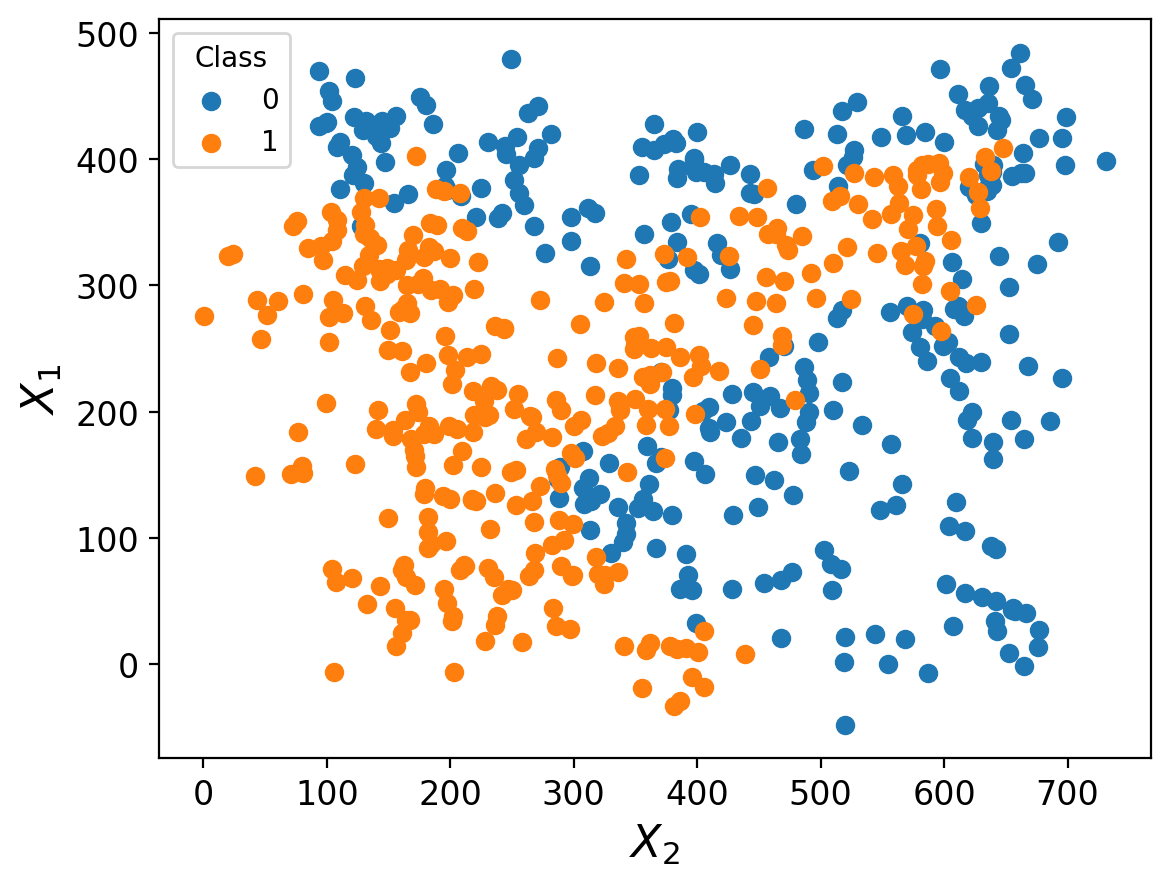

In [39]:
ax = plot_2d_classification(hard_data)

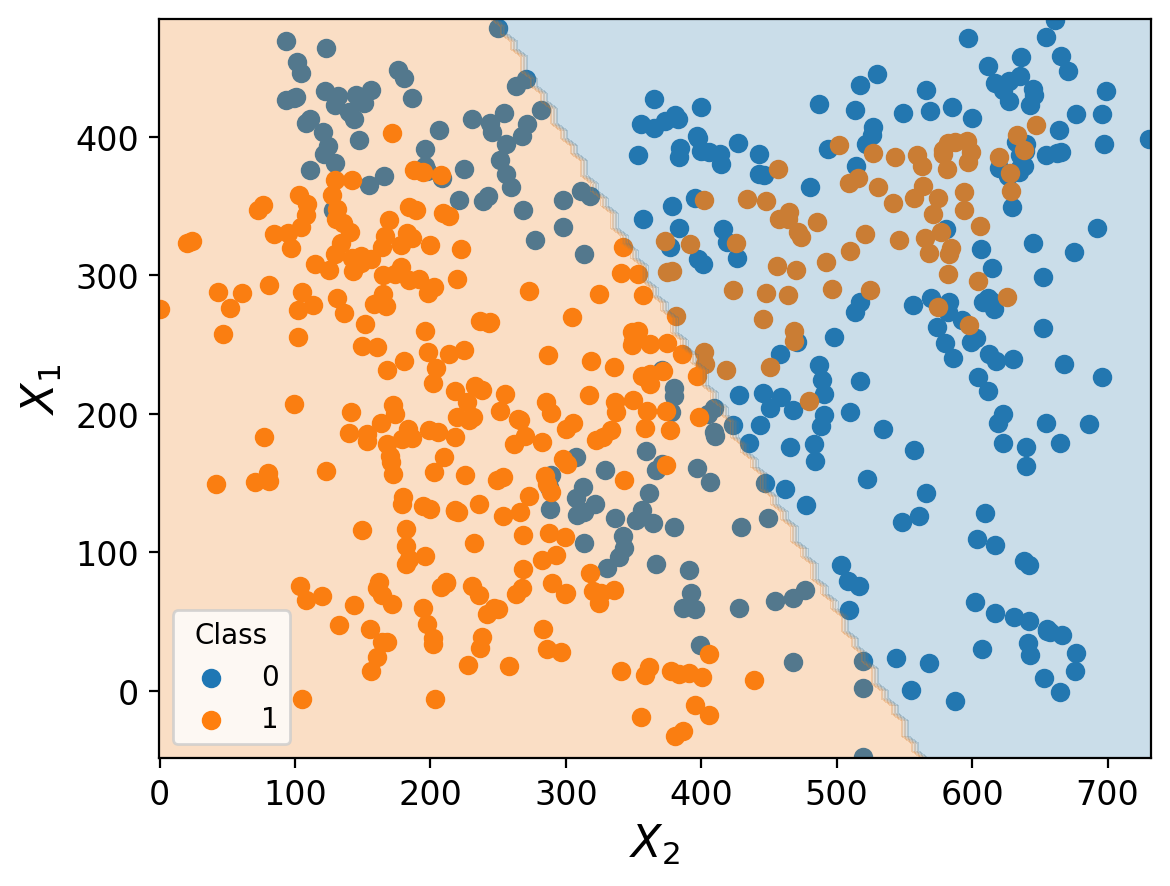

In [40]:
ax = plot_2d_classification(hard_data)
DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict", cmap=cmap, ax=ax
)

In [41]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [81]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)

DecisionTreeClassifier(max_depth=1)

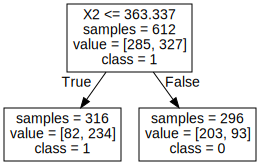

In [82]:
import graphviz

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=FEATURE_NAMES,
    impurity=False,
    class_names=CLASS_NAMES,
)
graph = graphviz.Source(dot_data)
graph

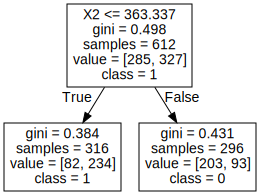

In [83]:
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=FEATURE_NAMES,
    impurity=True,
    class_names=CLASS_NAMES,
)
graph = graphviz.Source(dot_data)
graph

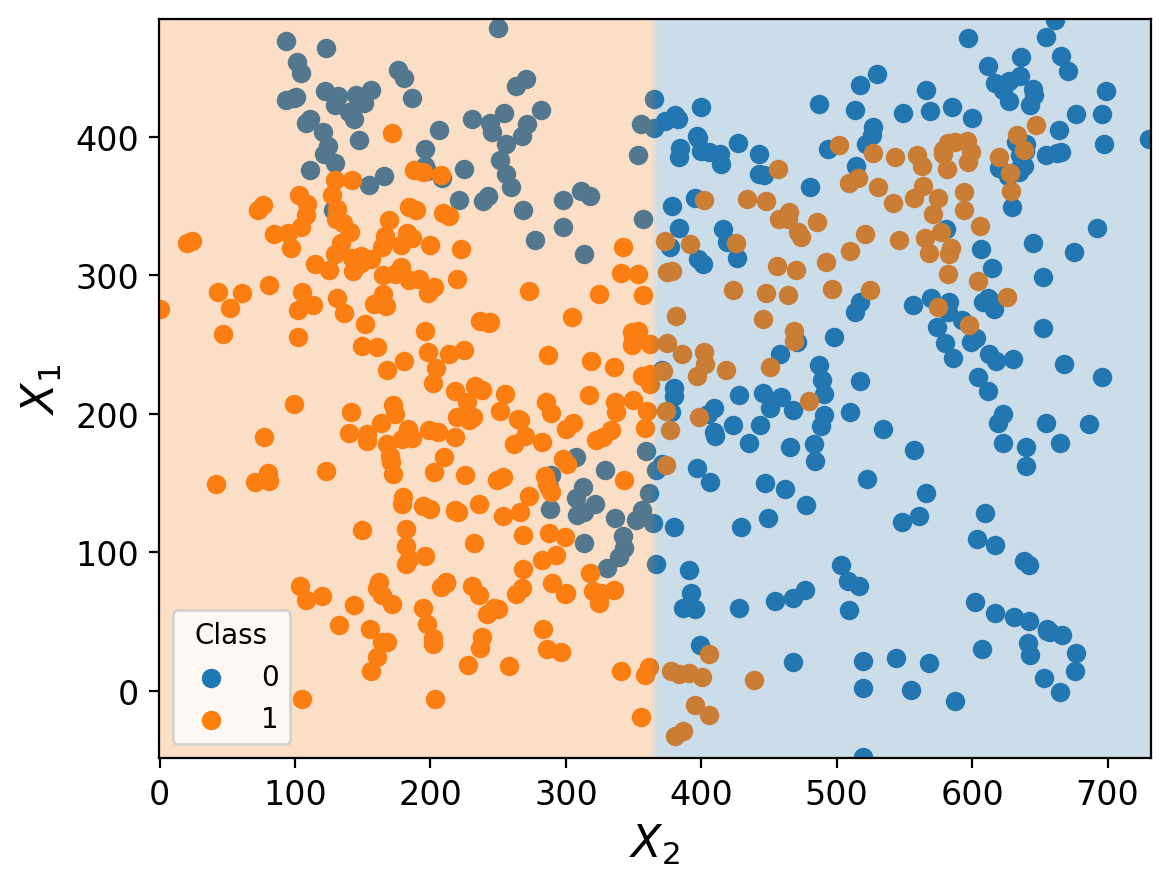

In [45]:
ax = plot_2d_classification(hard_data)
DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict", cmap=cmap, ax=ax
)
None

In [59]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)

DecisionTreeClassifier(max_depth=2)

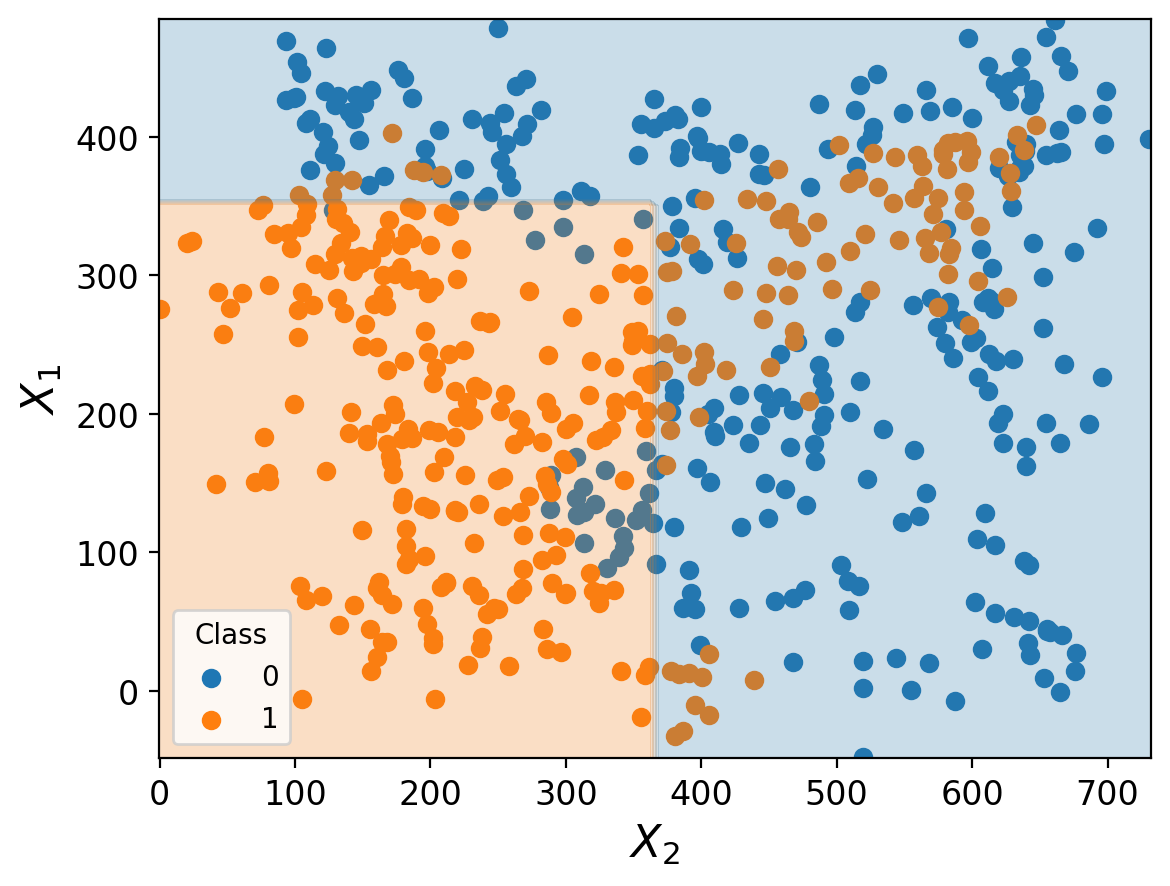

In [60]:
ax = plot_2d_classification(hard_data)
DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict", cmap=cmap, ax=ax
)
None

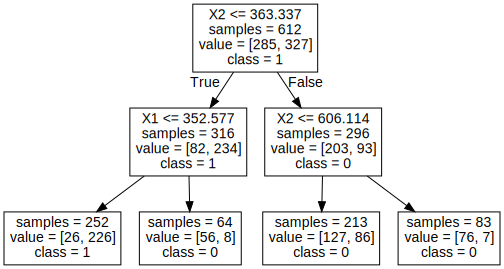

In [61]:
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=FEATURE_NAMES,
    impurity=False,
    class_names=CLASS_NAMES,
)
graph = graphviz.Source(dot_data)
graph

In [62]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

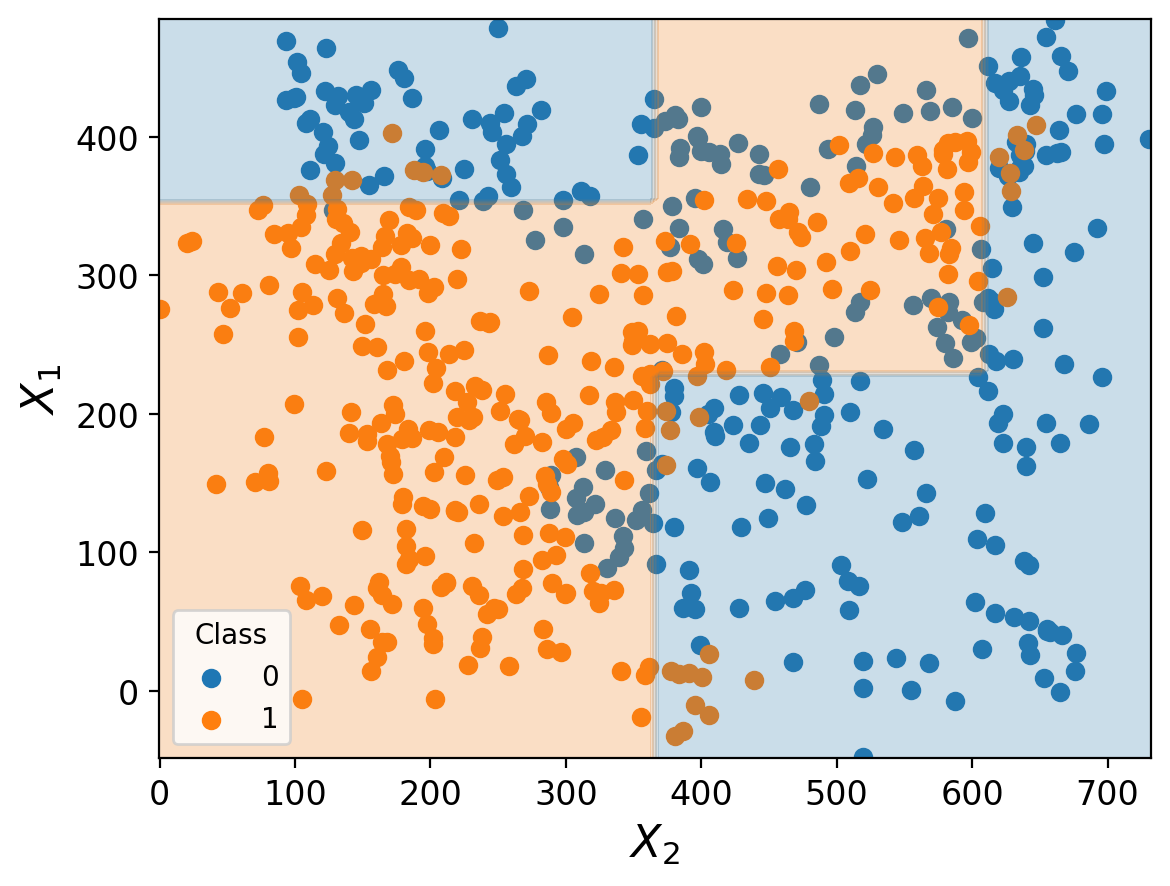

In [64]:
ax = plot_2d_classification(hard_data)
DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict", cmap=cmap, ax=ax
)
None

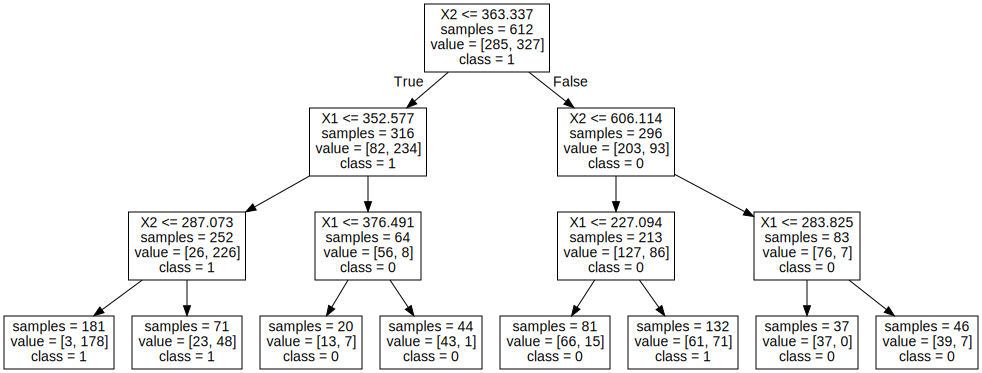

In [65]:
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=FEATURE_NAMES,
    impurity=False,
    class_names=CLASS_NAMES,
)
graph = graphviz.Source(dot_data)
graph

In [66]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X, y)

DecisionTreeClassifier(max_depth=10)

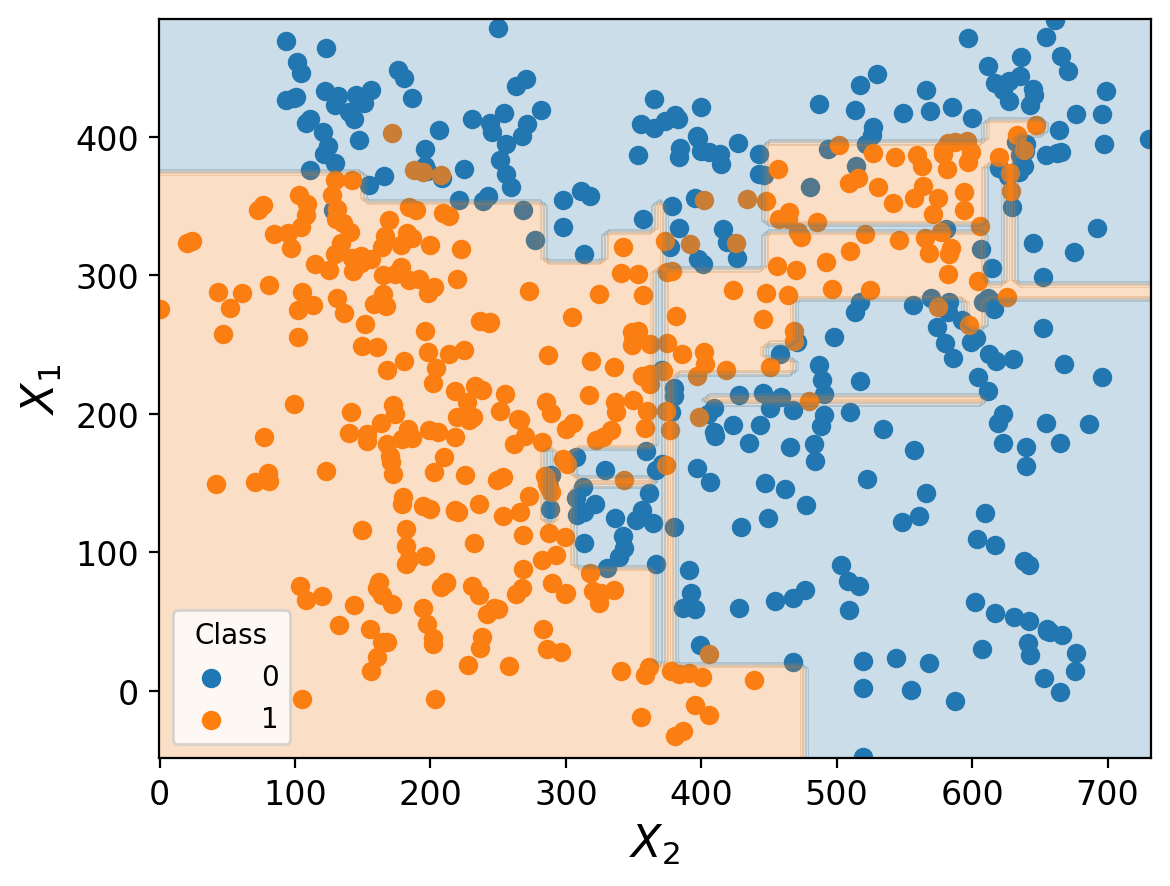

In [68]:
ax = plot_2d_classification(hard_data)
DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict", cmap=cmap, ax=ax
)
None

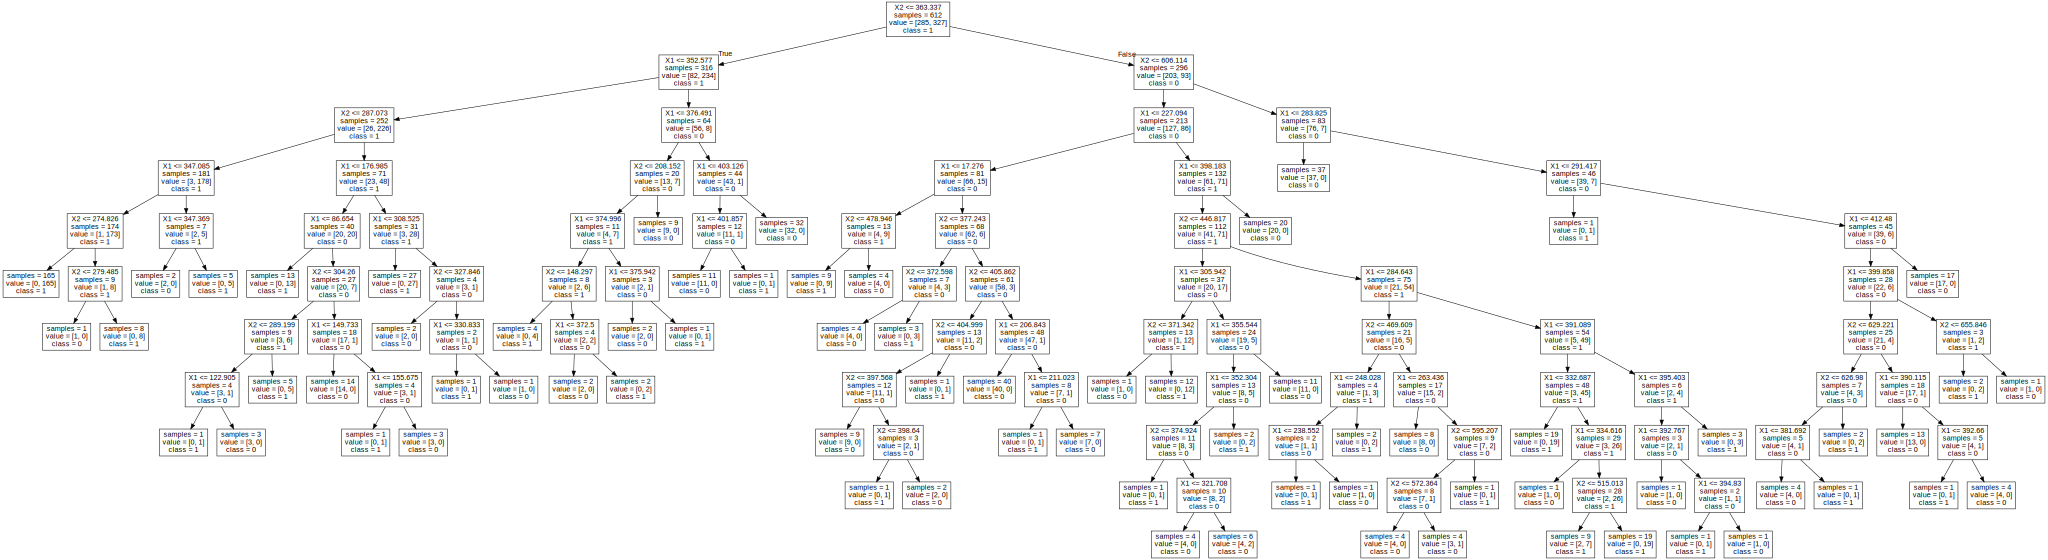

In [69]:
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=FEATURE_NAMES,
    impurity=False,
    class_names=CLASS_NAMES,
)
graph = graphviz.Source(dot_data)
graph

In [143]:
root = Path("./tree_anim")
root.mkdir(exist_ok=True)

for max_depth in range(1, 10):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X, y)
    ax = plot_2d_classification(hard_data)
    DecisionBoundaryDisplay.from_estimator(
        model, X, response_method="predict", cmap=cmap, ax=ax
    )
    ax.set_title(f"max_depth = {max_depth:2d}")
    fig = plt.gcf()
    fig.savefig((root / f"tree_depth_{max_depth:02d}.png").as_posix(), dpi=200)
    plt.close()

In [144]:
# ffmpeg -framerate 1  -i tree_anim/tree_depth_%02d.png -c:v libx264 -pix_fmt yuv420p  tree_anim.mp4

In [94]:
p = np.linspace(0.01, 0.99, 99)
gini = 2 * p * (1 - p)
logloss = -p * np.log(p) - (1 - p) * np.log(1 - p)

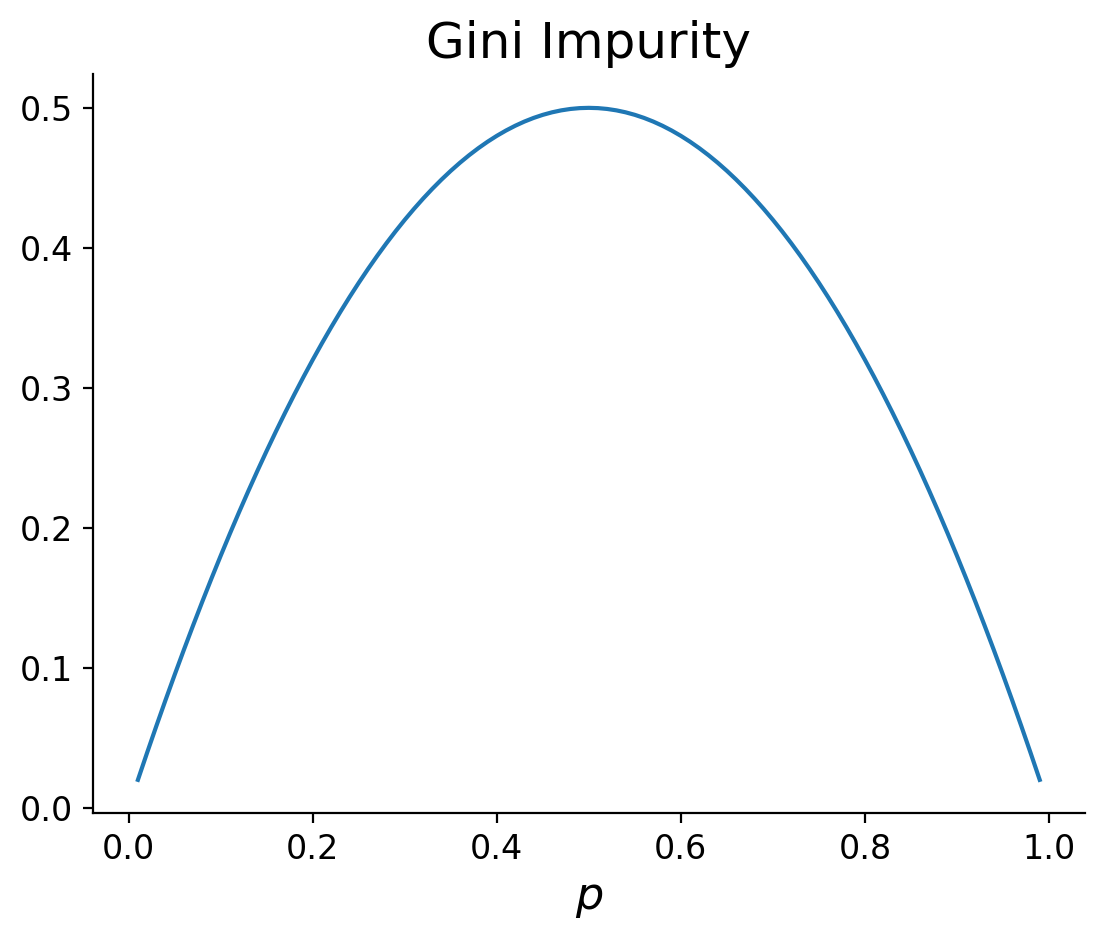

In [100]:
fig, ax = plt.subplots()
ax.plot(p, gini)
ax.set_xlabel(r"$p$")
ax.set_title("Gini Impurity")
None

$$Gini = 2p \left(1 - p\right)$$